# Hola Eduardo! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>


## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Buen trabajo, pero faltó revisar más en detalle los datos, aún hay observaciones que merece revisar si se descartan. El entrenamiento de los modelos me parece que está correcto, revisa los datos si aún hay que cambiarlos y luego revisa cómo cambian los resultados de los modelos. 
    
Saludos!    
</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Bien hecho Eduardo, has corregido lo que faltaba y el resto del notebook ya estaba bien, por lo tanto, está todo lo necesario. No tengo más comentarios a realizar, tu notebook está aprobado.
    
Saludos!    
</div>

----

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [2]:
# Cargar DataSet
df = pd.read_csv("datasets/car_data.csv")

In [3]:
# Exploracion inicial 
display(HTML('<h1> Rusty Bargain DataFrame'))
display(HTML('<hr>'))

display(HTML('<h2> Informacion general'))
display(df.info())
display(HTML('<hr>'))

display(HTML('<h2> Estadisticas descriptivas'))
display(df.describe())
display(HTML('<hr>'))

display(HTML('<h2> Muestra de tabla'))
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
118901,03/04/2016 04:36,14500,suv,2008,auto,140,tiguan,150000,12,gasoline,volkswagen,no,03/04/2016 00:00,0,14467,03/04/2016 09:43
77330,12/03/2016 16:49,2200,small,2008,manual,67,getz,150000,7,petrol,hyundai,no,12/03/2016 00:00,0,41749,07/04/2016 07:17
107925,11/03/2016 23:56,850,small,2000,manual,54,corsa,150000,1,petrol,opel,no,11/03/2016 00:00,0,59368,05/04/2016 17:45
222660,24/03/2016 16:55,950,small,1996,manual,60,golf,150000,0,petrol,volkswagen,no,24/03/2016 00:00,0,45896,07/04/2016 09:17
103202,17/03/2016 12:38,1500,sedan,1998,manual,0,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,25746,21/03/2016 15:46


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien, esto muestra los datos disponibles.
</div>

## Preprocesamiento de datos

In [4]:
# Eliminar filas duplicadas
print(f"Numero de duplicados previos: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Verificacion de duplicados: {df.duplicated().sum()}")

Numero de duplicados previos: 262
Verificacion de duplicados: 0


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto, es poco probable que estos datos tengan todas las columnas iguales y estén correctos.
</div>

In [5]:
print(f"Numero de valores nulos previos: {df.isnull().sum()}")

# Imputar valores nulos con la moda para las columnas categoricas
df['VehicleType'].fillna(df['VehicleType'].mode()[0], inplace=True)
df['Gearbox'].fillna(df['Gearbox'].mode()[0], inplace=True)
df['Model'].fillna(df['Model'].mode()[0], inplace=True)
df['FuelType'].fillna(df['FuelType'].mode()[0], inplace=True)
df['NotRepaired'].fillna('no', inplace=True)  # Asumimos que la mayoría de los autos no están reparados

print(f"Verificacion de valores nulos : {df.isnull().sum()}")

Numero de valores nulos previos: DateCrawled              0
Price                    0
VehicleType          37484
RegistrationYear         0
Gearbox              19830
Power                    0
Model                19701
Mileage                  0
RegistrationMonth        0
FuelType             32889
Brand                    0
NotRepaired          71145
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64
Verificacion de valores nulos : DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, pero cuidado, no siempre es bueno imputar por la moda general, normalmente es mejor condicionar esta moda a otros valores.
</div>

In [6]:
# Eliminar filas donde el precio es 0
df = df[df['Price'] > 0]

In [7]:
# Definir el rango de años de registro válidos
current_year = datetime.now().year
df = df[(df['RegistrationYear'] >= 1900) & (df['RegistrationYear'] <= current_year)]

In [8]:
# Eliminar filas donde la potencia es 0
df = df[df['Power'] > 0]

In [9]:
# Convertir columnas de fechas a formato datetime
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'], format='%d/%m/%Y %H:%M')
df['DateCreated'] = pd.to_datetime(df['DateCreated'], format='%d/%m/%Y %H:%M')
df['LastSeen'] = pd.to_datetime(df['LastSeen'], format='%d/%m/%Y %H:%M')


In [10]:
# Eliminar columnas irrelevantes
# Nota: Reiniciar el kernel despues de la primera ejecucion
df = df.drop(columns=['NumberOfPictures'])


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto, es una columna constante
</div>

In [11]:

# Revisión final de los datos
display(HTML('<h1> Revisión final del DataFrame'))
display(df.info())
display(df.describe())
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
Index: 306945 entries, 1 to 354368
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        306945 non-null  datetime64[ns]
 1   Price              306945 non-null  int64         
 2   VehicleType        306945 non-null  object        
 3   RegistrationYear   306945 non-null  int64         
 4   Gearbox            306945 non-null  object        
 5   Power              306945 non-null  int64         
 6   Model              306945 non-null  object        
 7   Mileage            306945 non-null  int64         
 8   RegistrationMonth  306945 non-null  int64         
 9   FuelType           306945 non-null  object        
 10  Brand              306945 non-null  object        
 11  NotRepaired        306945 non-null  object        
 12  DateCreated        306945 non-null  datetime64[ns]
 13  PostalCode         306945 non-null  int64        

None

,DateCrawled,Price,RegistrationYear,Power,Mileage,RegistrationMonth,DateCreated,PostalCode,LastSeen
count,306945,306945.000000,306945.000000,306945.000000,306945.000000,306945.000000,306945,306945.000000,306945
mean,2016-03-21 13:19:09.149000960,4809.852270,2003.298962,124.084830,128418.250827,5.962941,2016-03-20 19:27:56.481454080,51148.072329,2016-03-30 04:26:53.551092992
min,2016-03-05 14:06:00,1.000000,1910.000000,1.000000,5000.000000,0.000000,2015-03-20 00:00:00,1067.000000,2016-03-05 14:15:00
25%,2016-03-13 11:51:00,1300.000000,1999.000000,75.000000,125000.000000,3.000000,2016-03-13 00:00:00,30900.000000,2016-03-23 12:51:00
50%,2016-03-21 17:58:00,3100.000000,2003.000000,110.000000,150000.000000,6.000000,2016-03-21 00:00:00,50170.000000,2016-04-03 23:47:00
75%,2016-03-29 14:48:00,6950.000000,2008.000000,150.000000,150000.000000,9.000000,2016-03-29 00:00:00,71711.000000,2016-04-06 10:45:00
max,2016-04-07 14:36:00,20000.000000,2019.000000,20000.000000,150000.000000,12.000000,2016-04-07 00:00:00,99998.000000,2016-04-07 14:58:00
std,NaN,4586.739108,6.955970,194.578317,36748.849246,3.600665,NaN,25769.625847,NaN


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,PostalCode,LastSeen
164541,2016-03-17 02:36:00,6500,sedan,2003,auto,170,5er,150000,10,petrol,bmw,no,2016-03-17,16727,2016-03-17 07:52:00
105564,2016-03-09 20:45:00,850,sedan,2018,manual,60,corsa,150000,7,petrol,opel,no,2016-03-09,59609,2016-03-26 08:16:00
168187,2016-03-19 14:42:00,7100,convertible,1988,manual,95,golf,125000,3,petrol,volkswagen,no,2016-03-19,47877,2016-04-06 21:18:00
11679,2016-04-06 23:06:00,2300,small,2003,manual,58,corsa,150000,3,petrol,opel,no,2016-04-06,61118,2016-04-06 23:25:00
1144,2016-04-03 22:57:00,3800,sedan,2005,manual,90,astra,150000,0,petrol,opel,no,2016-04-03,27726,2016-04-06 00:45:00


### Preprocesamiento de datos (Explicacion)

Durante este proceso de preparacion de datos se realizaron varias cosas, por ejemplo
- Se cargo el archivo car_data.csv en un dataframe y realizamos un analisis de su estructura

- Se realizo una exploracoon inicial usando metodos como .info() para obtener detalles sobre el numero de entradas, tipos de datos y balores nulos.

- Generamos estadisticas descriptivas de las columnas numericas usando el metodo .describe()

- Obtuvimos una muestra aleatoria del dataframe mediante el uso del metodo sample()

- Se descarto las filas duplicadas con el metodo drop_duplicates

- Imputamos los valores nulos de las columnas categóricas con la moda (valor más frecuente) usando fillna().

- Se realizaron cambios en la columnas de fecha convirtiendolo al formato adecuado usando el metodo pd.to_datetime()

- Tambien se elimino la columna "NumberOfPictures" ya que todos sus valores son 0 y no aportan informacion util al modelo.

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Esta bien, pero nota que la columna price tiene precios 0, registration year tiene valores muy pequeños y muy grandes y power también tiene valores 0. Revisa qué hay que descartar. Una vez corregido esto revisaré los resultados de los modelos. El entrenamiento de estos me parece correcto, por lo que solamente revisa cómo cambian los resultados.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, se filtraron varios datos que no hacian sentido.
</div>

## Entrenamiento del modelo 

In [12]:
# Excluir columnas de fechas
columns_to_exclude = ['DateCrawled', 'DateCreated', 'LastSeen']

# Division del conjunto de datos:

X = df.drop(columns=['Price'] + columns_to_exclude)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [13]:
# Codificacion de variables categoricas (OHE)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurarse de que ambas matrices tienen las mismas columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [14]:
# Regresion linear

# Medir tiempo de entrenamiento 
start_time = time.time()

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Medir el tiempo de entrenamiento
training_time_lin = time.time() - start_time

y_pred_lin = lin_reg.predict(X_test)

#evaluacion
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print(f'Regresion linear RMSE: {rmse_lin}')
print(f'Regression Linear Training Time: {training_time_lin} seconds')

Regresion linear RMSE: 2896.89866446691
Regression Linear Training Time: 4.383101224899292 seconds


In [15]:
# Árbol de decisión 
# Medir el tiempo de entrenamiento
start_time = time.time()

tree_reg = DecisionTreeRegressor(random_state=12345)
tree_reg.fit(X_train, y_train)

# Medir el tiempo de entrenamiento
training_time_tree = time.time() - start_time

# Medir el tiempo de entrenamiento
start_time = time.time()
y_pred_tree = tree_reg.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print(f'Decision Tree RMSE: {rmse_tree}')
print(f'Decision Tree Training Time: {training_time_tree} seconds')

Decision Tree RMSE: 2068.9675700147905
Decision Tree Training Time: 5.503253698348999 seconds


In [16]:
# Ajustar los parámetros para reducir el tiempo de entrenamiento
forest_reg = RandomForestRegressor(
    n_estimators=100,       # Reducir el número de árboles
    max_depth=10,           # Limitar la profundidad máxima de los árboles
    max_features='sqrt',    # Reducir el número de características consideradas
    n_jobs=-1,              # Paralelizar el entrenamiento (usa todos los núcleos disponibles)
    random_state=42
)
# Medir el tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo
forest_reg.fit(X_train, y_train)

# Medir el tiempo de entrenamiento
training_time_forest = time.time() - start_time

# Predicciones
y_pred_forest = forest_reg.predict(X_test)

# Evaluación
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
print(f'Random Forest RMSE: {rmse_forest}')
print(f'Random Forest Training Time: {training_time_forest} seconds')

Random Forest RMSE: 2880.8542610591453
Random Forest Training Time: 6.361469268798828 seconds


In [17]:
# Preparar datos para LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Medir el tiempo de entrenamiento
start_time = time.time()

# Parámetros
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'verbose': -1
}

# Entrenar el modelo con early stopping
lgbm_reg = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(100),
        ],
)
# Medir el tiempo de entrenamiento
training_time_lgbm = time.time() - start_time


# Predicciones
y_pred_lgbm = lgbm_reg.predict(X_test, num_iteration=lgbm_reg.best_iteration)

# Evaluación
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
print(f'LightGBM RMSE: {rmse_lgbm}')
print(f'LightGBM Training Time: {training_time_lgbm} seconds')

Training until validation scores don't improve for 100 rounds
[100]	train's rmse: 1688.55	valid's rmse: 1702.87
[200]	train's rmse: 1618.9	valid's rmse: 1652.89
[300]	train's rmse: 1579.08	valid's rmse: 1628.73
[400]	train's rmse: 1550.34	valid's rmse: 1614.17
[500]	train's rmse: 1526.55	valid's rmse: 1603.16
[600]	train's rmse: 1505.15	valid's rmse: 1594.02
[700]	train's rmse: 1483.52	valid's rmse: 1584.95
[800]	train's rmse: 1465.92	valid's rmse: 1578.54
[900]	train's rmse: 1446.87	valid's rmse: 1572.2
[1000]	train's rmse: 1434.59	valid's rmse: 1568.52
Did not meet early stopping. Best iteration is:
[1000]	train's rmse: 1434.59	valid's rmse: 1568.52
LightGBM RMSE: 1568.5190677021421
LightGBM Training Time: 3.9288523197174072 seconds


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien con el entrenamiento de los modelos.
</div>

## Análisis del modelo

In [18]:
# Comparacion entre modelos
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'LightGBM'],
    'RMSE': [rmse_lin, rmse_tree, rmse_forest, rmse_lgbm],
    'Training Time (s)': [training_time_lin, training_time_tree, training_time_forest, training_time_lgbm]
}

results_df = pd.DataFrame(results)
display(results_df)


,Model,RMSE,Training Time (s)
0,Linear Regression,2896.898664,4.383101
1,Decision Tree,2068.967570,5.503254
2,Random Forest,2880.854261,6.361469
3,LightGBM,1568.519068,3.928852


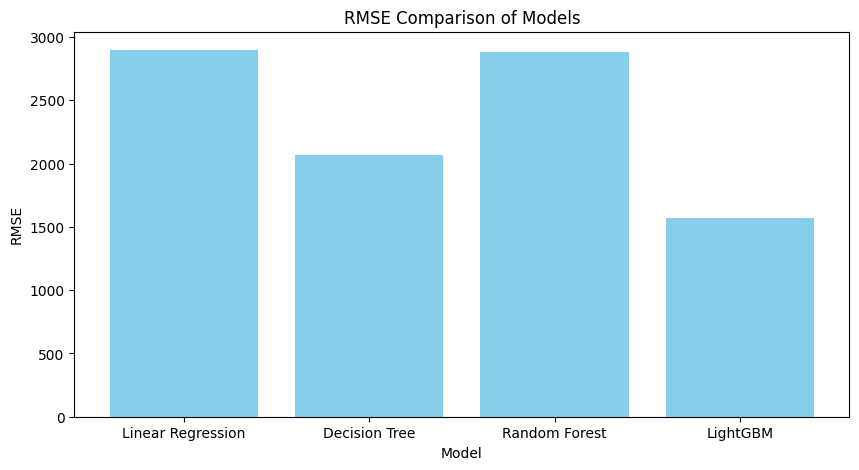

In [19]:
# Crear gráfico de barras para RMSE
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Models')
plt.show()


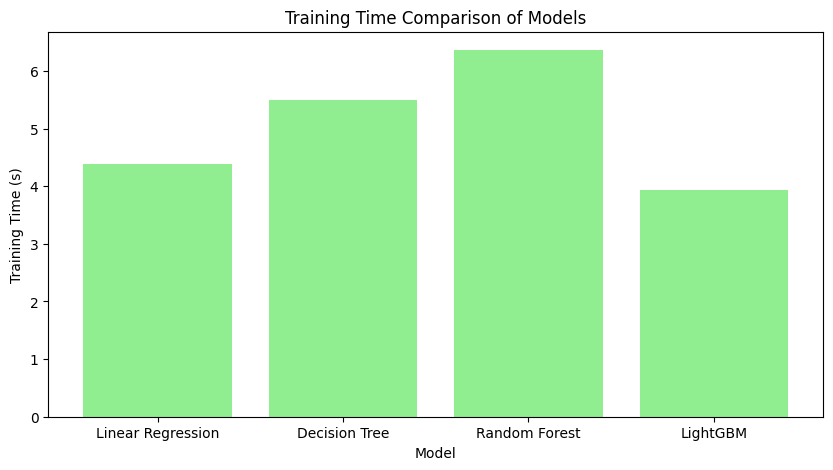

In [20]:
# Crear gráfico de barras para Tiempo de Entrenamiento
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['Training Time (s)'], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison of Models')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Correcto!
</div>

## Conclusion 

Con base en los resultados obtenidos podemos evaluar que modelo ofrece un balance mejor entre precision y eficiencia. Aqui hay algunas consideraciones

- Regresion lineal: La de menor tiempo de entrenamiento pero no puede capturar relaciones complejas
- Arbol de Decision: Puede ser mas preciso pero tiende a sobreajustarse
- Bosque Aleatorio: Suele ofrecer un buen balance entre precision y tiempo de entrenamieno, mejor que los arboles individuales
- LightGBM: Generalmente muy preciso y eficiente para los conjuntos de datos mas grandes

En conclusion el mejor modelo que cumple con los objetivos que les interesa a RustyVargain:

- Calidad de prediccion: LightGBM ofrece la mejor precisión (menor RMSE), lo que es crucial para una aplicación que determina el valor de mercado de los coches.
- Velocidad de la prediccion: Aunque el tiempo de entrenamiento es mayor, es aceptable considerando la mejora significativa en la precisión
- Tiempo requerido para el entremiento: LightGBM ofrece un buen equilibrio entre precision y tiempo de entrenamiento.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, efectivametne LightGBM se ve mejor en todos los aspectos a considerar.
</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos